# Import libaries

In [2]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from wordcloud import WordCloud

# Read dataset 

In [8]:
df_train = pd.read_csv("/kaggle/input/dataset-cs221/train_en.csv")
df_val = pd.read_csv("/kaggle/input/dataset-cs221/val_en.csv")
df_test = pd.read_csv("/kaggle/input/dataset-cs221/test_en.csv")

In [9]:
df_train.head(10)

,text,binary,multiclass,id
0,"#USER# #USER# I'm really liking this project, ...",Hope,Realistic Hope,5820
1,#USER# Oh shit really? I would hope they'd she...,Hope,Generalized Hope,4061
2,"#USER# Good morning, Bud! 🥰 Another good decis...",Hope,Generalized Hope,1621
3,i aspire to have the level of delusion to beli...,Hope,Unrealistic Hope,1754
4,#USER# #USER# Projects are continuously attack...,Not Hope,Not Hope,401
5,#USER# 49ers in the NFL are a private company....,Hope,Generalized Hope,3994
6,$SPY $SPX update:\nLooking excellent. Pretty n...,Hope,Generalized Hope,1780
7,#USER# Schools are forbidden from initiating o...,Not Hope,Not Hope,1624
8,I was in FCA in high-school and was heavily in...,Not Hope,Not Hope,1157
9,"#USER# #USER# #USER# Problem is Gav, 'normal p...",Not Hope,Not Hope,1131


# Preprocessing

In [14]:
# Preprocess function
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    tokens = [token for token in tokens if re.match(r'^\w+$', token)]
    
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def preprocess(df):
    df["clean_text"] = df["text"].apply(preprocess_text)

In [15]:
preprocess(df_train)
df_train.head()

,text,binary,multiclass,id,clean_text
0,"#USER# #USER# I'm really liking this project, ...",Hope,Realistic Hope,5820,user user realli like project let work togeth ...
1,#USER# Oh shit really? I would hope they'd she...,Hope,Generalized Hope,4061,user oh shit realli would hope shed light happ...
2,"#USER# Good morning, Bud! 🥰 Another good decis...",Hope,Generalized Hope,1621,user good morn bud anoth good decis scotu morn...
3,i aspire to have the level of delusion to beli...,Hope,Unrealistic Hope,1754,aspir level delus believ thing 1 thing 2 hallo...
4,#USER# #USER# Projects are continuously attack...,Not Hope,Not Hope,401,user user project continu attack hacker nightm...


In [17]:
preprocess(df_val)
df_val.head()

,text,binary,multiclass,id,clean_text
0,She should be proving herself to you. Successf...,Not Hope,Not Hope,3229,prove success interact pursuit never seen sele...
1,The female desire for tall men comes from thei...,Not Hope,Not Hope,36,femal desir tall men come evolutionari adapt c...
2,“The inside of the old Camaro smelled like asp...,Not Hope,Not Hope,136,insid old camaro smell like asphalt desir gaso...
3,The villa must be boring during the day if the...,Not Hope,Not Hope,1970,villa must bore day realli yearn gossip like
4,#USER# #USER# #USER# #USER# #USER# #USER# #USE...,Hope,Generalized Hope,1569,user user user user user user user user user u...


In [18]:
preprocess(df_test)
df_test.head()

,text,binary,multiclass,id,clean_text
0,Volatility term structure is trading back in c...,Not Hope,Not Hope,1120,volatil term structur trade back contango stee...
1,#USER# Very sad last night - we were up two ga...,Hope,Generalized Hope,4300,user sad last night two game game 3 type oppor...
2,"my mind is continuously looping through ""vacat...",Not Hope,Not Hope,1008,mind continu loop vacat take place paradis inh...
3,#USER# i used to go around with my one armed g...,Hope,Generalized Hope,8003,user use go around one arm glass till could ar...
4,#USER# Do we know the episode count for this s...,Not Hope,Not Hope,3449,user know episod count seri 12 24 12 guess mig...


# Data Visualization

## Text Statistics

In [29]:
# Length
df_train["length"] = df_train["clean_text"].apply(len)
max_length = df_train["length"].max()
min_length = df_train["length"].min()
avg_length = df_train["length"].mean()

# Number of tokens and vocabularies/words
df_train["tokens"] = df_train["clean_text"].apply(lambda x: x.split())
num_tokens = df_train["tokens"].apply(len).sum()
num_vocab = len(set(df_train["tokens"].sum()))

# Class/Label distribution
class_counts_1 = df_train["binary"].value_counts()
class_counts_2 = df_train['multiclass'].value_counts()
# Hiển thị kết quả
print("## Train text statistics:")
print(f"Max length: {max_length}")
print(f"Min length: {min_length}")
print(f"Average length: {avg_length:.2f}")
print(f"Number of tokens: {num_tokens}")
print(f"Number of vocabulary: {num_vocab} \n")
print(f"Class distribution:")
print(f"{class_counts_1} \n")
print(class_counts_2)

## Train text statistics:
Max length: 404
Min length: 16
Average length: 100.78
Number of tokens: 107461
Number of vocabulary: 12868 

Class distribution:
binary
Hope        3104
Not Hope    3088
Name: count, dtype: int64 

multiclass
Not Hope            3088
Generalized Hope    1726
Realistic Hope       730
Unrealistic Hope     648
Name: count, dtype: int64


In [31]:
# Length
df_val["length"] = df_val["clean_text"].apply(len)
max_length = df_val["length"].max()
min_length = df_val["length"].min()
avg_length = df_val["length"].mean()

# Number of tokens and vocabularies/words
df_val["tokens"] = df_val["clean_text"].apply(lambda x: x.split())
num_tokens = df_val["tokens"].apply(len).sum()
num_vocab = len(set(df_val["tokens"].sum()))

# Class/Label distribution
class_counts_1 = df_val["binary"].value_counts()
class_counts_2 = df_val['multiclass'].value_counts()
# Hiển thị kết quả
print("## Validation text statistics:")
print(f"Max length: {max_length}")
print(f"Min length: {min_length}")
print(f"Average length: {avg_length:.2f}")
print(f"Number of tokens: {num_tokens}")
print(f"Number of vocabulary: {num_vocab} \n")
print(f"Class distribution:")
print(f"{class_counts_1} \n")
print(class_counts_2)

## Validation text statistics:
Max length: 290
Min length: 18
Average length: 97.57
Number of tokens: 17379
Number of vocabulary: 4554 

Class distribution:
binary
Hope        530
Not Hope    502
Name: count, dtype: int64 

multiclass
Not Hope            502
Generalized Hope    300
Realistic Hope      128
Unrealistic Hope    102
Name: count, dtype: int64


In [32]:
# Length
df_test["length"] = df_test["clean_text"].apply(len)
max_length = df_test["length"].max()
min_length = df_test["length"].min()
avg_length = df_test["length"].mean()

# Number of tokens and vocabularies/words
df_test["tokens"] = df_test["clean_text"].apply(lambda x: x.split())
num_tokens = df_test["tokens"].apply(len).sum()
num_vocab = len(set(df_test["tokens"].sum()))

# Class/Label distribution
class_counts_1 = df_test["binary"].value_counts()
class_counts_2 = df_test['multiclass'].value_counts()
# Hiển thị kết quả
print("## Test text statistics:")
print(f"Max length: {max_length}")
print(f"Min length: {min_length}")
print(f"Average length: {avg_length:.2f}")
print(f"Number of tokens: {num_tokens}")
print(f"Number of vocabulary: {num_vocab} \n")
print(f"Class distribution:")
print(f"{class_counts_1} \n")
print(class_counts_2)

## Test text statistics:
Max length: 290
Min length: 23
Average length: 101.13
Number of tokens: 17989
Number of vocabulary: 4556 

Class distribution:
binary
Hope        541
Not Hope    491
Name: count, dtype: int64 

multiclass
Not Hope            491
Generalized Hope    309
Realistic Hope      124
Unrealistic Hope    108
Name: count, dtype: int64


## Word Cloud

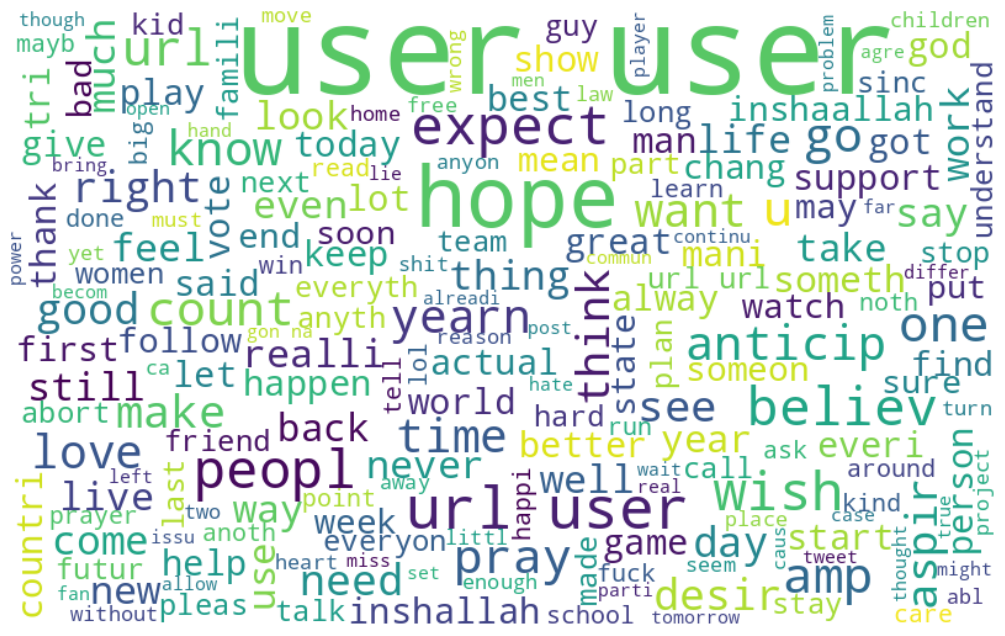

In [33]:
all_words = " ".join([sentence for sentence in df_train["clean_text"]])
wordcloud = WordCloud(background_color='white', width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Feature extraction using TF-IDF

In [35]:
X_train = df_train["clean_text"]
y_train_binary = df_train["binary"]
y_train_multiclass = df_train["multiclass"]

X_test = df_test["clean_text"]
y_test_binary = df_test["binary"]
y_test_multiclass = df_test["multiclass"]

In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# SVM Modeling (with TF-IDF technique)

## Binary classification

In [37]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train_binary)

SVC(kernel='linear')

In [38]:
y_pred_svm = svm.predict(X_test)

In [39]:
accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report SVM:")
print(classification_report(y_test_binary, y_pred_svm))

SVM Accuracy: 0.7906976744186046
Classification Report SVM:
              precision    recall  f1-score   support

        Hope       0.81      0.78      0.80       541
    Not Hope       0.77      0.80      0.78       491

    accuracy                           0.79      1032
   macro avg       0.79      0.79      0.79      1032
weighted avg       0.79      0.79      0.79      1032



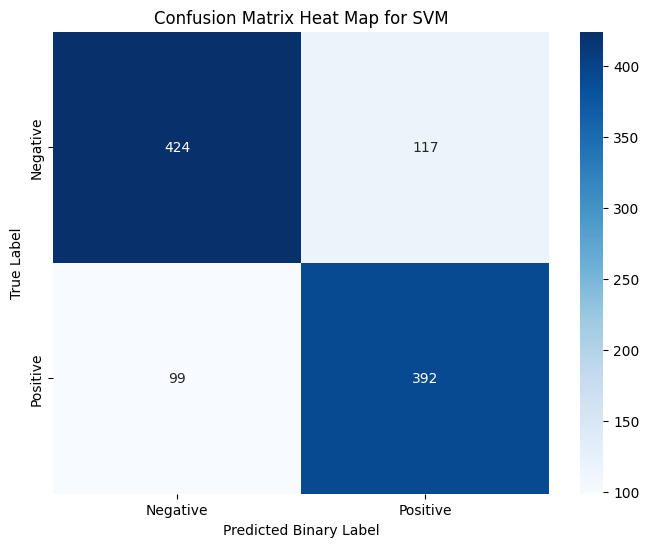

In [42]:
cm_svm = confusion_matrix(y_test_binary, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Binary Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for SVM')
plt.show()

## Multiclass classification

In [43]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train_multiclass)

SVC(kernel='linear')

In [44]:
y_pred_svm = svm.predict(X_test)

In [45]:
accuracy_svm = accuracy_score(y_test_multiclass, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report SVM:")
print(classification_report(y_test_multiclass, y_pred_svm))

SVM Accuracy: 0.6550387596899225
Classification Report SVM:
                  precision    recall  f1-score   support

Generalized Hope       0.57      0.63      0.60       309
        Not Hope       0.72      0.86      0.78       491
  Realistic Hope       0.42      0.15      0.22       124
Unrealistic Hope       0.67      0.36      0.47       108

        accuracy                           0.66      1032
       macro avg       0.60      0.50      0.52      1032
    weighted avg       0.63      0.66      0.63      1032



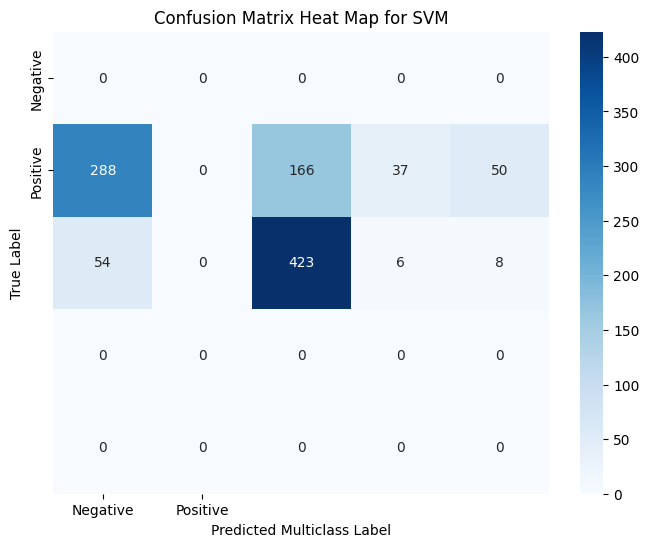

In [46]:
cm_svm = confusion_matrix(y_test_binary, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Multiclass Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for SVM')
plt.show()